In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import random

In [2]:
df=pd.read_csv('spotify.csv')

In [3]:
df.head()

,Unnamed: 0,endTime,artistName,trackName,msPlayed
0,0,2020-12-13 15:17,Avicii,Taste The Feeling (Avicii Vs. Conrad Sewell),131738
1,1,2020-12-14 12:50,Robin Schulz,All We Got (feat. KIDDO),190218
2,2,2020-12-14 12:53,Pink Sweat$,At My Worst,170344
3,3,2020-12-14 12:56,Jack Harlow,Tyler Herro,156497
4,4,2020-12-14 12:59,Clairo,Sofia,188386


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-12-13 15:17,Avicii,Taste The Feeling (Avicii Vs. Conrad Sewell),131738
1,2020-12-14 12:50,Robin Schulz,All We Got (feat. KIDDO),190218
2,2020-12-14 12:53,Pink Sweat$,At My Worst,170344
3,2020-12-14 12:56,Jack Harlow,Tyler Herro,156497
4,2020-12-14 12:59,Clairo,Sofia,188386


In [6]:
df['date']=df.endTime.apply(lambda x:x.split(' ')[0])

In [7]:
df.head()

,endTime,artistName,trackName,msPlayed,date
0,2020-12-13 15:17,Avicii,Taste The Feeling (Avicii Vs. Conrad Sewell),131738,2020-12-13
1,2020-12-14 12:50,Robin Schulz,All We Got (feat. KIDDO),190218,2020-12-14
2,2020-12-14 12:53,Pink Sweat$,At My Worst,170344,2020-12-14
3,2020-12-14 12:56,Jack Harlow,Tyler Herro,156497,2020-12-14
4,2020-12-14 12:59,Clairo,Sofia,188386,2020-12-14


In [8]:
df['when']=pd.to_datetime(df['endTime'])

In [9]:
df['year']=pd.DatetimeIndex(df['when']).year

In [10]:
df['Month']=pd.DatetimeIndex(df['when']).month

In [11]:
df['time of day']=pd.DatetimeIndex(df['when']).time

In [12]:
df['hr']=pd.DatetimeIndex(df['when']).hour

In [13]:
df['dayname']=df['when'].apply(lambda x:x.day_name())

In [14]:
df['count']=1.0

In [15]:
df.head()

,endTime,artistName,trackName,msPlayed,date,when,year,Month,time of day,hr,dayname,count
0,2020-12-13 15:17,Avicii,Taste The Feeling (Avicii Vs. Conrad Sewell),131738,2020-12-13,2020-12-13 15:17:00,2020,12,15:17:00,15,Sunday,1.0
1,2020-12-14 12:50,Robin Schulz,All We Got (feat. KIDDO),190218,2020-12-14,2020-12-14 12:50:00,2020,12,12:50:00,12,Monday,1.0
2,2020-12-14 12:53,Pink Sweat$,At My Worst,170344,2020-12-14,2020-12-14 12:53:00,2020,12,12:53:00,12,Monday,1.0
3,2020-12-14 12:56,Jack Harlow,Tyler Herro,156497,2020-12-14,2020-12-14 12:56:00,2020,12,12:56:00,12,Monday,1.0
4,2020-12-14 12:59,Clairo,Sofia,188386,2020-12-14,2020-12-14 12:59:00,2020,12,12:59:00,12,Monday,1.0


In [16]:
df['duration(min)']=round(df['msPlayed']/60000,2)

In [17]:
df.head()

,endTime,artistName,trackName,msPlayed,date,when,year,Month,time of day,hr,dayname,count,duration(min)
0,2020-12-13 15:17,Avicii,Taste The Feeling (Avicii Vs. Conrad Sewell),131738,2020-12-13,2020-12-13 15:17:00,2020,12,15:17:00,15,Sunday,1.0,2.20
1,2020-12-14 12:50,Robin Schulz,All We Got (feat. KIDDO),190218,2020-12-14,2020-12-14 12:50:00,2020,12,12:50:00,12,Monday,1.0,3.17
2,2020-12-14 12:53,Pink Sweat$,At My Worst,170344,2020-12-14,2020-12-14 12:53:00,2020,12,12:53:00,12,Monday,1.0,2.84
3,2020-12-14 12:56,Jack Harlow,Tyler Herro,156497,2020-12-14,2020-12-14 12:56:00,2020,12,12:56:00,12,Monday,1.0,2.61
4,2020-12-14 12:59,Clairo,Sofia,188386,2020-12-14,2020-12-14 12:59:00,2020,12,12:59:00,12,Monday,1.0,3.14


In [18]:
df['duration(min)']=df['duration(min)'].astype(float)

In [19]:
df.head()

,endTime,artistName,trackName,msPlayed,date,when,year,Month,time of day,hr,dayname,count,duration(min)
0,2020-12-13 15:17,Avicii,Taste The Feeling (Avicii Vs. Conrad Sewell),131738,2020-12-13,2020-12-13 15:17:00,2020,12,15:17:00,15,Sunday,1.0,2.20
1,2020-12-14 12:50,Robin Schulz,All We Got (feat. KIDDO),190218,2020-12-14,2020-12-14 12:50:00,2020,12,12:50:00,12,Monday,1.0,3.17
2,2020-12-14 12:53,Pink Sweat$,At My Worst,170344,2020-12-14,2020-12-14 12:53:00,2020,12,12:53:00,12,Monday,1.0,2.84
3,2020-12-14 12:56,Jack Harlow,Tyler Herro,156497,2020-12-14,2020-12-14 12:56:00,2020,12,12:56:00,12,Monday,1.0,2.61
4,2020-12-14 12:59,Clairo,Sofia,188386,2020-12-14,2020-12-14 12:59:00,2020,12,12:59:00,12,Monday,1.0,3.14


In [20]:
df.drop(['endTime','msPlayed'],axis=1,inplace=True)

In [21]:
df.head()

,artistName,trackName,date,when,year,Month,time of day,hr,dayname,count,duration(min)
0,Avicii,Taste The Feeling (Avicii Vs. Conrad Sewell),2020-12-13,2020-12-13 15:17:00,2020,12,15:17:00,15,Sunday,1.0,2.20
1,Robin Schulz,All We Got (feat. KIDDO),2020-12-14,2020-12-14 12:50:00,2020,12,12:50:00,12,Monday,1.0,3.17
2,Pink Sweat$,At My Worst,2020-12-14,2020-12-14 12:53:00,2020,12,12:53:00,12,Monday,1.0,2.84
3,Jack Harlow,Tyler Herro,2020-12-14,2020-12-14 12:56:00,2020,12,12:56:00,12,Monday,1.0,2.61
4,Clairo,Sofia,2020-12-14,2020-12-14 12:59:00,2020,12,12:59:00,12,Monday,1.0,3.14


In [22]:
df.set_index('date',inplace=True)

In [23]:
df.head()

,artistName,trackName,when,year,Month,time of day,hr,dayname,count,duration(min)
date,,,,,,,,,,
2020-12-13,Avicii,Taste The Feeling (Avicii Vs. Conrad Sewell),2020-12-13 15:17:00,2020,12,15:17:00,15,Sunday,1.0,2.20
2020-12-14,Robin Schulz,All We Got (feat. KIDDO),2020-12-14 12:50:00,2020,12,12:50:00,12,Monday,1.0,3.17
2020-12-14,Pink Sweat$,At My Worst,2020-12-14 12:53:00,2020,12,12:53:00,12,Monday,1.0,2.84
2020-12-14,Jack Harlow,Tyler Herro,2020-12-14 12:56:00,2020,12,12:56:00,12,Monday,1.0,2.61
2020-12-14,Clairo,Sofia,2020-12-14 12:59:00,2020,12,12:59:00,12,Monday,1.0,3.14


In [24]:
df.index = pd.to_datetime(df.index, errors='coerce')

In [25]:
df.head()

,artistName,trackName,when,year,Month,time of day,hr,dayname,count,duration(min)
date,,,,,,,,,,
2020-12-13,Avicii,Taste The Feeling (Avicii Vs. Conrad Sewell),2020-12-13 15:17:00,2020,12,15:17:00,15,Sunday,1.0,2.20
2020-12-14,Robin Schulz,All We Got (feat. KIDDO),2020-12-14 12:50:00,2020,12,12:50:00,12,Monday,1.0,3.17
2020-12-14,Pink Sweat$,At My Worst,2020-12-14 12:53:00,2020,12,12:53:00,12,Monday,1.0,2.84
2020-12-14,Jack Harlow,Tyler Herro,2020-12-14 12:56:00,2020,12,12:56:00,12,Monday,1.0,2.61
2020-12-14,Clairo,Sofia,2020-12-14 12:59:00,2020,12,12:59:00,12,Monday,1.0,3.14


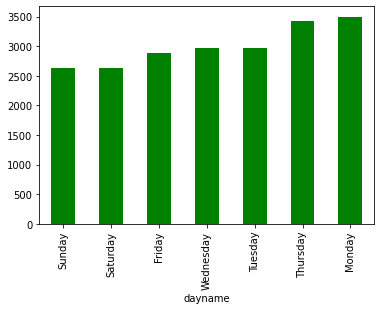

In [26]:
df.groupby('dayname')['duration(min)'].sum().sort_values().plot(kind='bar',color='green');

It seems that listening time is highest on monday followed by thursday

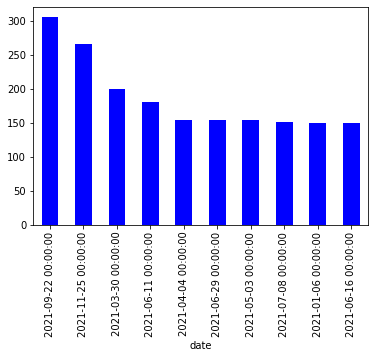

In [27]:
df.groupby('date')['duration(min)'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='blue');

2021-09-22 has the highest listening time and only one song was played which is strange.Perhaps the song was being played in loop and phone was kept away

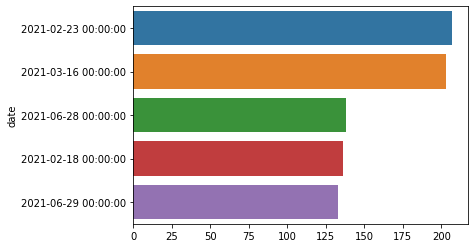

In [28]:
no_of_songs=df.groupby('date')['count'].sum().sort_values(ascending=False).head()
sns.barplot(y=no_of_songs.index,x=no_of_songs.values);

Though highest listiening time was on 2021-09-22 but highest number of songs were listened on 2021-02-23

In [29]:
df['hr'].value_counts().head()

2     1513
3     1154
12     963
11     936
1      771
Name: hr, dtype: int64

Peak listening time is around 2.00A.M

In [30]:
df.groupby('Month')['count'].sum().sort_values()

Month
11     322.0
10     374.0
12     454.0
1      635.0
9      752.0
8      803.0
4      831.0
6     1176.0
2     1259.0
7     1396.0
5     1404.0
3     1460.0
Name: count, dtype: float64

highest number of songs are played in the month of March

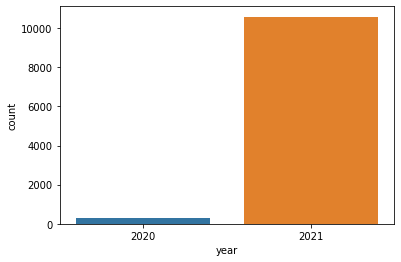

In [31]:
sns.countplot(x=df['year']);

In [32]:
df['artistName'].value_counts(normalize=True).head(10)*100

A.R. Rahman               4.178170
Sid Sriram                3.506350
Pritam                    2.806921
S. P. Balasubrahmanyam    2.724094
Billie Eilish             2.337567
Shreya Ghoshal            1.711761
Haricharan                1.684152
Karthik                   1.684152
Devi Sri Prasad           1.610528
L. V. Revanth             1.555310
Name: artistName, dtype: float64

A.R.Rahman is the most listened artist consequently could be favorite artist

In [33]:
df['trackName'].value_counts().head(10)

Luckkanna Mate Nillu             138
Ennadi Maayavi Nee               134
Ay Pilla - Telugu                 90
lovely (with Khalid)              69
Chitti (From "Jathi Ratnalu")     66
Urumulu Nimuvvalai                48
Six Feet Under                    46
Maula Mere Maula                  45
Falling Slowly                    44
Manasuna Edho Raagam              43
Name: trackName, dtype: int64

Most Played song is Lukkannamate nillu which is followed by ennadimayve

In [34]:
unique_artists =df["artistName"].nunique() # Count number of unique artist in dataset
unique_artists

989

In [35]:
total_artists = df["artistName"].count()
total_artists

10866

In [36]:
df.describe()

,year,Month,hr,count,duration(min)
count,10866.000000,10866.000000,10866.000000,10866.0,10866.000000
mean,2020.973771,5.579514,8.326615,1.0,1.932561
std,0.159822,2.936979,5.754846,0.0,2.179992
min,2020.000000,1.000000,0.000000,1.0,0.000000
25%,2021.000000,3.000000,3.000000,1.0,0.020000
50%,2021.000000,5.000000,8.000000,1.0,1.100000
75%,2021.000000,7.000000,12.000000,1.0,3.590000
max,2021.000000,12.000000,23.000000,1.0,43.930000


#creating a playlist of 50 most listened songs

In [50]:
temp=df['trackName'].value_counts().head(50).index.to_list()

In [54]:
Myplaylist=np.random.permutation(temp)